# Introducción a los sistemas complejos: _Tarea 2_

## Briones Andrade Joshua


In [1]:
# Importamos las librerias que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# los datos ya estan convertidos en el formato .txt para agilizar el proceso
Y1 = pd.read_csv("casos_diarios_1.txt", usecols=[1], sep="\t+", header=None).to_numpy()
Y2 = pd.read_csv("casos_diarios_2.txt", usecols=[1], sep="\t+", header=None).to_numpy()

<ipython-input-2-14bd4a201d87>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Y1 = pd.read_csv("casos_diarios_1.txt", usecols=[1], sep="\t+", header=None).to_numpy()
<ipython-input-2-14bd4a201d87>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Y2 = pd.read_csv("casos_diarios_2.txt", usecols=[1], sep="\t+", header=None).to_numpy()


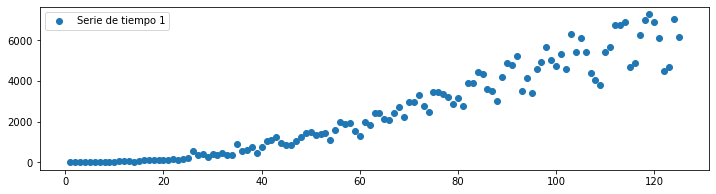

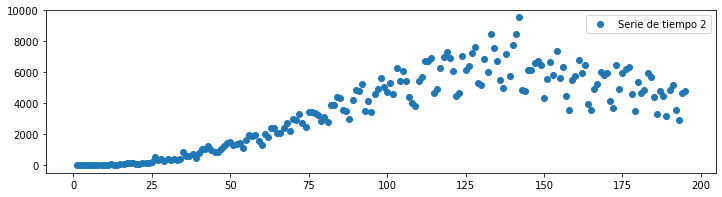

In [5]:
X1 = np.linspace(1, len(Y1), len(Y1))
X2 = np.linspace(1, len(Y2), len(Y2))

plt.figure(figsize=(12,3))
plt.scatter(X1, Y1, label="Serie de tiempo 1"); 
plt.legend(); plt.show()

plt.figure(figsize=(12,3))
plt.scatter(X2, Y2, label="Serie de tiempo 2"); 
plt.legend(); plt.show()

In [6]:
# Normalizamos los datos para optimizar el rendimiento
Y1_n = Y1/np.max(Y1)
Y2_n = Y2/np.max(Y1)

In [7]:
# Definimos la ecuación para la curva Gaussiana y Log normal
A_1 = 10000; mu_1 = 110; alfa_1 = 0.01;
A_2 = 8000; mu_2 = 4; alfa_2 = 2;

A_1n= A_1/np.max(Y1); A_2n= A_2/np.max(Y2);

def Gauss(X, alfa, A, mu):
    return A*np.exp(-alfa*(X-mu)**2)

def L_norm(X, alfa, A, mu):
    return A*np.exp(-alfa*(np.log(X)-mu)**2)

P = [Gauss, L_norm]

Utilizamos la función de distancia dada por la siguiente formula

$$d = \frac{1}{N}\sum_{i=1}^N|Y_n-P(X, \alpha, \mu)|$$

Consideramos que como $Y_n$ esta normalizada, se puede decir que $A=1$ para $P(X, \alpha, \mu)$ y solo es necesario reescalarla multiplicando por $\max\{Y\}$ para obtener el ajuste que la describe.

In [8]:
# Definimos la función de distancia

def dist(X, Y, P, alfa, A, mu):
    return np.mean(np.abs(Y-P(X, alfa, A, mu)))

dist(X1, Y1_n, P[0], alfa_1, A_1, mu_1)

1398.016345521511

In [9]:
def learning(X, Y, P, alfa, A, mu, n=2000):
    alpha = alfa; Au = A;  miu = mu
    err = dist(X, Y, P, alfa, A, mu)
    
    hist = np.zeros((n, 4))

    for k in range(n):
        hist[k] = err, alpha, Au, miu

        alpha_t = alpha*(1+ np.random.choice([-1/5000, 1/5000]))    
#         Au_t = Au*(1+ np.random.choice([-1/10000, 1/10000])) 
        miu_t = miu*(1+ np.random.choice([-1/10000, 1/10000])) 
        
        if dist(X, Y, P, alpha_t, Au, miu_t) < err:
            alpha = alpha_t  
#             Au = Au_t
            miu = miu_t
            err = dist(X, Y, P, alpha, Au, miu)
            
        else: pass
        
    return hist

In [22]:
hist_1 = learning(X1, Y1_n, P[0], alfa_1, 1, mu_1, n=10000000)
Errs_1, Alphas_1, Aces_1, Mius_1 = hist_1.T

In [23]:
hist_2 = learning(X2, Y2_n, P[1], alfa_2, 1, mu_2, n=10000000)
Errs_2, Alphas_2, Aces_2, Mius_2 = hist_2.T

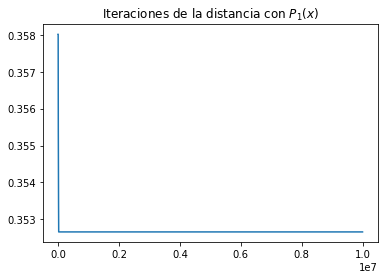

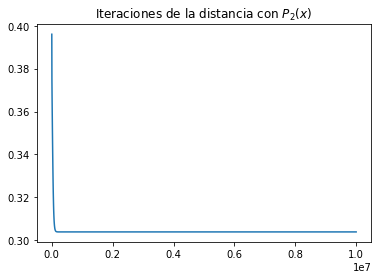

In [24]:
plt.plot(np.arange(0, len(Errs_1)), Errs_1)
plt.title(r"Iteraciones de la distancia con $P_1(x)$")
plt.show()

plt.plot(np.arange(0, len(Errs_2)), Errs_2)
plt.title(r"Iteraciones de la distancia con $P_2(x)$")
plt.show()

Continuamos con la gráfica de los primeros y últimos valores de $\alpha$ en los modelos

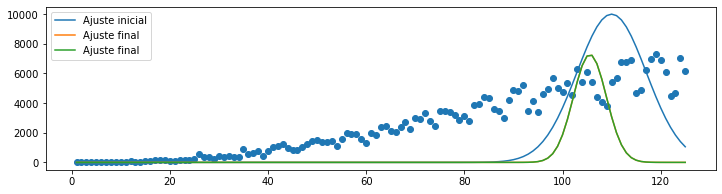

In [27]:
plt.figure(figsize=(12,3))
plt.scatter(X1, Y1)
plt.plot(X1, Gauss(X1, alfa_1, A_1, mu_1), label="Ajuste inicial")
plt.plot(X1, np.max(Y1)*Gauss(X1, Alphas_1[5000000], Aces_1[5000000], Mius_1[5000000]), label="Ajuste final")
plt.plot(X1, np.max(Y1)*Gauss(X1, Alphas_1[-1], Aces_1[-1], Mius_1[-1]), label="Ajuste final")
plt.legend(); plt.show()

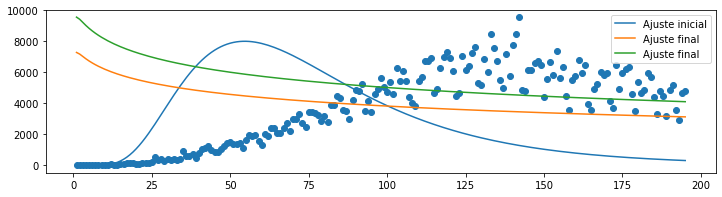

In [28]:
plt.figure(figsize=(12,3))
plt.scatter(X2, Y2)
plt.plot(X2, P[1](X2, alfa_2, A_2, mu_2), label="Ajuste inicial")
plt.plot(X2, np.max(Y1)*P[1](X2, Alphas_2[5000000], Aces_2[5000000], Mius_2[5000000]), label="Ajuste final")
plt.plot(X2, np.max(Y2)*P[1](X2, Alphas_2[-1], Aces_2[-1], Mius_2[-1]), label="Ajuste final")
plt.legend(); plt.show()

In [48]:
# Ajustes reescalados 
def Gauss_t(X, alfa, A, mu):
    return A*np.exp(-alfa*(X-mu)**2)*np.max(Y1)

def L_norm_t(X, alfa, A, mu):
    return A*np.exp(-alfa*(np.log(X)-mu)**2)*np.max(Y2)
P_t = [Gauss_t, L_norm_t]

Casos acumulados al día $d$
$$T(d)=\sum_{i=1}^d P(x)$$

In [68]:
# Definimos la función de casos acumulados
def T(d, P, hist):
    return np.sum(P(np.arange(1,1+d), hist.T[1][-1], hist.T[2][-1], hist.T[3][-1]))

T(200, P_t[0], hist_1), T(200, P_t[1], hist_2) 

(61544.45924921847, 1080391.8434725716)

In [93]:
C_1 = np.zeros((X2.shape[0])); C_2 = np.zeros((X2.shape[0]))

for i in range(C_1.shape[0]): 
    C_1[i] = T(i+1, P_t[0], hist_1)
for k in range(C_2.shape[0]): 
    C_2[k] = T(k+1, P_t[1], hist_2)

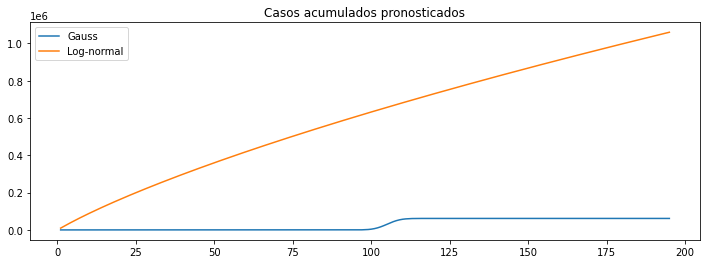

In [94]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(1,C_1.size+1), C_1, label="Gauss");
plt.plot(np.arange(1,C_2.size+1), C_2, label="Log-normal"); 
plt.legend(); plt.title("Casos acumulados pronosticados")
plt.show()

In [95]:
T(120, P_t[0], hist_1)

61544.18349881749

__¿Corresponde este número total de casos a lo que declaraban las autoridades sanitarias de México en aquellos meses?__

R: ___NO,___ dado que nuestros pronosticos y modelos no describen con precisión el comportamiento de la curva, podemos asegurar que se necesitan varios ordenes de magnitud más grandes para el número de iteraciones (mutaciones) que necesitan nuestros parámetros para dar una representación más fiel en los modelos plateados.

Se recomienda optimizar el algoritmo para acelerar el proceso de aprendizaje, ya que se toman varias horas para realizar estos procesos para ambos modelos.